In [1]:
import xarray as xr
import hvplot.xarray #no.qa
from pathlib import Path

In [88]:
root_dir = Path("D:/AIMS/Datasets/CMIP/CMIP5/MACAv2METDATA/CNRM-CM5/r1i1p1/") #rcp45")

## AnnAGNPS climate workflow

In [5]:
lat, lon = 34.1, -89.1

# Set lon in the [0, 360] range
lon = (lon + 360) % 360

startDate = "2050-01-01"
endDate = "2050-12-31"

In [105]:
cmip5_files = root_dir.glob('**/*.nc')

In [99]:
cmip5_files = root_dir.glob('historical/*.nc')

def preprocess(ds):
    if 'air_temperature' in ds:
        if 'minimum' in ds['air_temperature'].cell_methods:
            ds = ds.rename_vars({'air_temperature': 'tasmin'})
        elif 'maximum' in ds['air_temperature'].cell_methods:
            ds = ds.rename_vars({'air_temperature': 'tasmax'})
    elif 'relative_humidity' in ds:
        if 'minimum' in ds['relative_humidity'].cell_methods:
            ds = ds.rename_vars({'relative_humidity': 'rhsmin'})
        elif 'maximum' in ds['relative_humidity'].cell_methods:
            ds = ds.rename_vars({'relative_humidity': 'rhsmax'})
    return ds


ds = xr.open_mfdataset(cmip5_files, chunks={'time':'auto'}, preprocess=preprocess, parallel=True)

In [101]:
ds

<xarray.Dataset>
Dimensions:                                    (lat: 585, lon: 1386,
                                                time: 20454, crs: 2)
Coordinates:
  * lat                                        (lat) float64 25.06 25.1 ... 49.4
  * lon                                        (lon) float64 235.2 ... 292.9
  * time                                       (time) datetime64[ns] 1950-01-...
  * crs                                        (crs) int32 1 3
Data variables:
    eastward_wind                              (time, lat, lon) float32 dask.array<chunksize=(1826, 51, 123), meta=np.ndarray>
    northward_wind                             (time, lat, lon) float32 dask.array<chunksize=(1826, 51, 123), meta=np.ndarray>
    precipitation                              (time, lat, lon) float32 dask.array<chunksize=(1826, 51, 123), meta=np.ndarray>
    rhsmax                                     (time, lat, lon) float32 dask.array<chunksize=(1826, 51, 123), meta=np.ndarray>
    rhsmin                                     (time, lat, lon) float32 dask.array<chunksize=(1826, 51, 123), meta=np.ndarray>
    specific_humidity                          (time, lat, lon) float32 dask.array<chunksize=(1826, 51, 123), meta=np.ndarray>
    surface_downwelling_shortwave_flux_in_air  (time, lat, lon) float32 dask.array<chunksize=(1826, 51, 123), meta=np.ndarray>
    tasmax                                     (time, lat, lon) float32 dask.array<chunksize=(1826, 51, 123), meta=np.ndarray>
    tasmin                                     (time, lat, lon) float32 dask.array<chunksize=(1826, 51, 123), meta=np.ndarray>
    vpd                                        (time, lat, lon) float32 dask.array<chunksize=(1826, 65, 154), meta=np.ndarray>
Attributes: (12/46)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   GRID
    ...                              ...
    contributor_role:                Postdoctoral Fellow
    publisher_name:                  
    publisher_email:                 
    publisher_url:                   
    license:                         Creative Commons CC0 1.0 Universal Dedic...
    coordinate_system:               WGS84,EPSG:4326

In [32]:
dsvpd = xr.open_mfdataset(root_dir.glob('*vpd*.nc'))

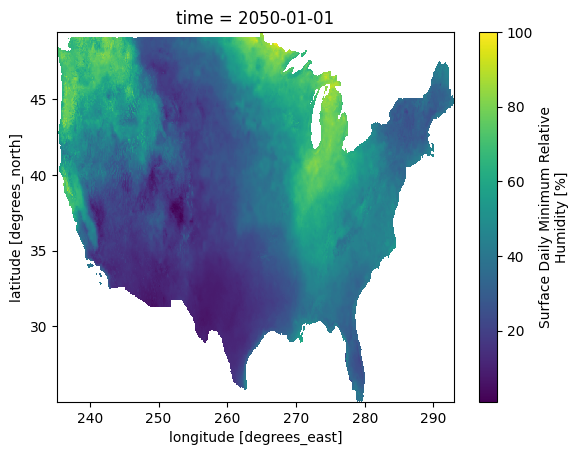

In [41]:
ds['relative_humidity'].sel(time=startDate, method='nearest').plot()

In [3]:
import pyagnps

clm_annagnps = pyagnps.climate.ClimateAnnAGNPSCoords(coords=(-89.1, 34.1), 
                                                    start="2024-01-01", 
                                                    end="2025-12-31", 
                                                    date_mode="UTC")

In [4]:
df = clm_annagnps.read_cmip6_generate_annagnps_climate_daily(cmip_files=cmip6_files, float_format='%.2f')

In [6]:
lon_act, lat_act = clm_annagnps.coords_actual
lon, lat = clm_annagnps.coords

print(f"Queried (lon, lat) : ({lon}, {lat})")
print(f"Actual (lon, lat) : ({lon_act:.3f}, {lat_act:.3f})")
print(f"lat_act - lat = {lat_act - lat:.3f} / lon_act - lon = {lon_act - lon:.3f}")

Queried (lon, lat) : (-89.1, 34.1)
Actual (lon, lat) : (-88.594, 34.319)
lat_act - lat = 0.219 / lon_act - lon = 0.506
